# Mapas Auto organizáveis de Kohonen

#### Aluno: Alexsandro Guilherme Thomas
#### Palavras Chave: SOM, Classificação, Mapas de Kohonen
#### Repositório Github: [https://github.com/northy/Inteligencia-Artificial](https://github.com/northy/Inteligencia-Artificial)

### Carros

<a href='https://archive.ics.uci.edu/ml/datasets/Car+Evaluation'>  <img style="width:40%;" src='https://archive.ics.uci.edu/ml/assets/MLimages/Large19.jpg' /></a>

**Informações do conjo de dados:** Avalia a aceitabilidade na venda de carros de acordo com sua condição.

**Os atributos são:**

* 1. Preço: muito alto, alto, médio, baixo
* 2. Custo da manutenção: muito alto, alto, médio, baixo
* 3. Portas: 2, 3, 4, 5+
* 4. Passageiros: 2, 4, +
* 5. Porta malas: pequeno, medio, grande
* 6. Segurança: pouca, média, alta
* 7. Classe (alvo): não aceito, aceito, bom, muito bom

# **Vamos começar!**
Após baixar no UCI Machine Learning Repository o arquivo de dados e tratar para *car.csv* contendo os dados sobre as configurações, vamos preparar o ambiente.

## Importando as bibliotecas

In [1]:
# instalar a biblioteca <minsom> *no Anaconda Prompt digite <> pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np

## Carregando os dados

In [2]:
base = pd.read_csv('car.csv')

base[base=='low'] = 0
base[base=='med'] = 1
base[base=='high'] = 2
base[base=='vhigh'] = 3

base[base=='small'] = 0
base[base=='med'] = 1
base[base=='big'] = 2

base[base=='5more'] = 5
base[base=='more'] = 5

In [3]:
base.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc


In [4]:
base.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,0,0,5,5,0,0,unacc
freq,432,432,432,576,576,576,1210


### Camada de entrada e rótulos para validação

In [5]:
X = base.iloc[:,0:6].values
y = base.iloc[:,6].values

print(X,'\n',y)

[[3 3 '2' '2' 0 0]
 [3 3 '2' '2' 0 1]
 [3 3 '2' '2' 0 2]
 ...
 [0 0 5 5 2 0]
 [0 0 5 5 2 1]
 [0 0 5 5 2 2]] 
 ['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


### Normalização dos dados

In [6]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

print(X)

[[1.  1.  0.  0.  0.  0. ]
 [1.  1.  0.  0.  0.  0.5]
 [1.  1.  0.  0.  0.  1. ]
 ...
 [0.  0.  1.  1.  1.  0. ]
 [0.  0.  1.  1.  1.  0.5]
 [0.  0.  1.  1.  1.  1. ]]


### Construção do SOM

O algoritmo de Kohonen foi desenvolvido por Teuvo Kohonen em 1982, sendo considerado relativamente simples e com a capacidade de organizar dimensionalmente dados complexos em grupos (clusters), de acordo com suas relações. Este método solicita apenas os parâmetros de entrada, mostrando-se ideal para problemas onde os padrões são desconhecidos ou indeterminados.
<a href='https://pt.wikipedia.org/wiki/Mapas_de_Kohonen#/media/Ficheiro:TrainSOM.gif'>  <img src='TrainSOM.gif' /></a>


In [7]:
som = MiniSom(x = 20, y = 20, input_len = len(X[0]), sigma = 1.0, learning_rate = 0.9, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000000)

#### Topologia da Rede

Os SOMs  têm duas camadas, a primeira é a camada de entrada e a segunda é a camada de saída ou o mapa de características. Ao contrário de outros tipos de RNA, SOM não tem função de ativação em neurônios, passamos pesos diretamente para a camada de saída sem fazer nada. Cada neurônio em um SOM é atribuído a um vetor de peso com a mesma dimensionalidade d do espaço de entrada. <a href='https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b'> <img src='Mapa.png'/> </a>

In [8]:
som._activation_map

array([[0.66998424, 0.54395205, 1.04727478, 1.0196041 , 0.57706286,
        0.42325502, 0.72517196, 1.19376728, 1.25514593, 0.94400138,
        1.31843324, 1.47838491, 1.36982159, 1.46101235, 1.50458694,
        1.49912304, 1.29872086, 0.86043618, 1.13205784, 1.00008922],
       [0.66752525, 0.75985543, 1.18325174, 1.08120831, 0.65260344,
        0.60602172, 0.91343946, 1.07578332, 1.03678762, 1.10064769,
        1.44623874, 1.75671285, 1.31447235, 1.48334943, 1.3551372 ,
        1.45138914, 1.07334604, 1.24146812, 1.19332944, 0.87290159],
       [0.94408953, 1.30190583, 1.28454957, 1.22985807, 0.75528606,
        0.83944631, 1.15377233, 1.42196844, 1.4000247 , 1.52697825,
        1.51513219, 1.85930094, 1.68145685, 1.65209691, 1.52267967,
        1.7739881 , 1.34240354, 1.53664203, 1.40240224, 1.18940038],
       [1.16613413, 0.93832685, 1.433411  , 1.31710438, 1.25878186,
        1.25591511, 1.3179416 , 1.3383045 , 1.60088547, 1.39449479,
        1.45587518, 1.68052496, 1.54902935, 1

#### Pesos do SOM

In [9]:
som._weights

array([[[8.01800754e-001, 9.92511024e-001, 5.64638378e-003,
         8.97728382e-001, 2.68395193e-071, 1.00000000e+000],
        [9.96973916e-001, 6.74620367e-001, 1.64696027e-001,
         8.03365812e-001, 1.28660273e-049, 9.99999980e-001],
        [9.90856613e-001, 6.68978042e-001, 8.76322568e-001,
         9.67864359e-001, 2.72975972e-032, 9.87887511e-001],
        ...,
        [5.42101353e-001, 8.69763992e-001, 1.24103901e-002,
         6.84384618e-001, 4.88838202e-001, 5.17992905e-032],
        [1.07949959e-001, 9.97040817e-001, 1.29969141e-001,
         9.97968056e-001, 1.41566298e-003, 5.33996619e-050],
        [2.07046229e-001, 9.91957435e-001, 1.24343573e-001,
         6.77951656e-001, 6.06583871e-009, 4.57934589e-071]],

       [[6.67192411e-001, 7.45947264e-001, 2.76652383e-001,
         7.11467449e-001, 2.25499935e-071, 1.00000000e+000],
        [9.75890521e-001, 9.91593863e-001, 4.53100344e-001,
         7.92846742e-001, 1.02795210e-049, 9.99999993e-001],
        [9.213055

## Visualizção dos Dados

### Visualização de quantas vezes determinado neurônio foi ativado

**Competição:**
Como dissemos antes, a cada neurônio em um SOM é atribuído um vetor de peso com a mesma dimensionalidade do espaço de entrada.
No exemplo abaixo, em cada neurônio da camada de saída teremos um vetor com dimensão n.
Calculamos a distância entre cada neurônio (neurônio da camada de saída) e os dados de entrada, e o neurônio com a menor distância será o vencedor da competição. 

A métrica euclidiana ***dj*** é comumente usada para medir distâncias: $$\ d_j =\sum_{i=1}^n(x_i-w_{ij})^2$$

<a href=https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065> <img src='competicao.png'/> </a>


In [10]:
q = som.activation_response(X)
q

array([[6., 4., 3., 5., 4., 4., 4., 2., 4., 4., 4., 4., 6., 3., 3., 5.,
        4., 4., 4., 4.],
       [5., 4., 4., 4., 5., 4., 4., 7., 4., 3., 4., 7., 7., 5., 4., 4.,
        5., 4., 4., 4.],
       [4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 5., 5., 5., 4., 4., 5.,
        5., 6., 4., 4.],
       [4., 4., 5., 4., 4., 5., 3., 3., 4., 4., 4., 6., 4., 4., 4., 4.,
        5., 5., 4., 4.],
       [8., 4., 5., 4., 4., 7., 3., 4., 4., 6., 5., 4., 4., 4., 5., 3.,
        5., 3., 6., 2.],
       [4., 7., 4., 6., 2., 5., 6., 5., 7., 7., 3., 3., 3., 4., 4., 3.,
        3., 4., 3., 5.],
       [4., 3., 4., 6., 4., 5., 5., 4., 4., 4., 4., 4., 3., 5., 4., 4.,
        3., 2., 4., 3.],
       [4., 6., 4., 3., 6., 4., 6., 5., 5., 4., 6., 6., 4., 4., 4., 4.,
        5., 4., 4., 4.],
       [4., 4., 2., 3., 5., 4., 3., 2., 4., 5., 6., 4., 4., 3., 5., 3.,
        5., 4., 4., 4.],
       [6., 4., 3., 8., 2., 4., 2., 5., 5., 4., 4., 3., 5., 4., 7., 4.,
        3., 4., 3., 4.],
       [4., 5., 4., 3., 4., 5.


### MID - distância média entre neurônios

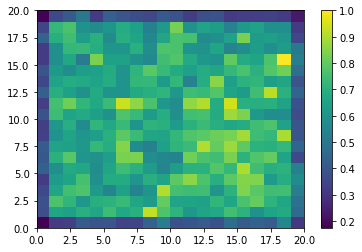

In [11]:
from matplotlib.pylab import pcolor, colorbar, plot, plt
pcolor(som.distance_map().T)
# MID - mean inter neuron distance
colorbar()

### Regiões de ativação (classe)

In [12]:
markers = ['o', 's','o','s']
y[y == 'unacc'] = 0
y[y == 'acc'] = 1
y[y == 'good'] = 2
y[y == 'vgood'] = 3
color = ['r', 'b', 'g', 'orange']

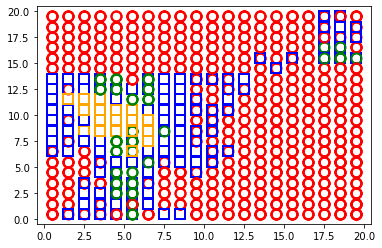

In [13]:
for i, x in enumerate(X):
    #print(i)
    #print(x)
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [26]:
w = som.winner(np.array([0,0,1,1,1,1]))
# Preço baixo, Manutenção baixa, 5+ portas, 5+ passageiros, porta malas grande, segurança alta
print(w)

(2, 11)


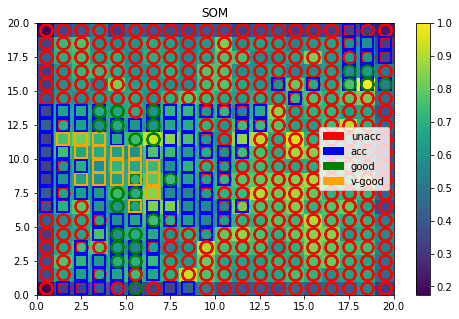

In [15]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='unacc')
blue_patch = mpatches.Patch(color='blue', label='acc')
green_patch = mpatches.Patch(color='green', label='good')
orange_patch = mpatches.Patch(color='orange', label='v-good')


plt.figure(figsize=(8,5))
plt.title('SOM')
plt.pcolor(som.distance_map().T) # distance map as background
plt.colorbar()

for cnt,xx in enumerate(X):
    w = som.winner(xx) # getting the winner
    plt.plot(w[0]+.5,w[1]+.5,markers[y[cnt]],markerfacecolor='None',
             markeredgecolor=color[y[cnt]],markersize=12,markeredgewidth=2)
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch, green_patch, orange_patch])
plt.show() # show the figure

### Resultados

Tira-se de interpretação que predominantemente as regiões do mapa formam regiões de não-aceitação, assim como o previsto pelo conteúdo do dataset. Regiões de aceitação, boa avaliação e muito boa avaliação ficaram contidas em espaços reconhecíveis e predominantemente distinguíveis no espaço do mapa, conferindo uma aceitabilidade ao modelo gerado.